## Online Shopping Sales Analysis
Read the data and solve the following questions to get meaningful insights

<br>**User_ID** : User id
<br>**Product_ID** : Product id
<br>**Gender** : Customer's gender
<br>**Age** : Customer's age
<br>**Occupation** : Customer's occupation
<br>**City_Category** : Three types of cities with different spending capacity
<br>**Stay_In_Current_City_Years** : Amount of years a customer has stayed in a particular city
<br>**Marital_Status** : Marital status of the customer
<br>**Product_Category_1** : Eighteen types of the cloth products
<br>**Purchase** : Was the product purchased or not purchased

###  Read/load the data into spark dataframe

In [1]:
# # hint code to load the data into spark dataframe 
import numpy as np # linear algebra
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
 
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

# # File location and type
file_location = "salesdatatrain.csv"
file_type = "csv"

# # CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# # The applied options are for CSV files. For other file types, these will be ignored.
rawDF = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

rawDF.show()

+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+--------+
|User_ID|Product_ID|Gender|  Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Purchase|
+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+--------+
|1000001| P00069042|     F| 0-17|        10|            A|                         2|             0|                 3|    8370|
|1000001| P00248942|     F| 0-17|        10|            A|                         2|             0|                 1|   15200|
|1000001| P00087842|     F| 0-17|        10|            A|                         2|             0|                12|    1422|
|1000001| P00085442|     F| 0-17|        10|            A|                         2|             0|                12|    1057|
|1000002| P00285442|     M|  55+|        16|            C|                        4+|            

### Q1. Print the number of rows and columns of the data

In [2]:
print('number of rows:',rawDF.count(), '\tnumber of columns:',len(rawDF.columns))

number of rows: 550068 	number of columns: 10


### Q2. Print schema and change column data types wherever necessary

In [3]:
from pyspark.sql.functions import col

In [4]:
rawDF.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Purchase: integer (nullable = true)



### Q3. Check basic statistics

In [5]:
rawDF.describe().show()

+-------+------------------+----------+------+------+------------------+-------------+--------------------------+-------------------+------------------+-----------------+
|summary|           User_ID|Product_ID|Gender|   Age|        Occupation|City_Category|Stay_In_Current_City_Years|     Marital_Status|Product_Category_1|         Purchase|
+-------+------------------+----------+------+------+------------------+-------------+--------------------------+-------------------+------------------+-----------------+
|  count|            550068|    550068|550068|550068|            550068|       550068|                    550068|             550068|            550068|           550068|
|   mean|1003028.8424013031|      null|  null|  null| 8.076706879876669|         null|         1.468494139793958|0.40965298835780306| 5.404270017525106|9263.968712959126|
| stddev|1727.5915855305068|      null|  null|  null|6.5226604873418275|         null|        0.9890866807573174|0.49177012631732925|3.9362113692

### Q4. Which age group has the highest purchase share

In [6]:
rawDF.groupBy("Age").sum("Purchase").orderBy("sum(Purchase)",ascending = False).show(1,False)

+-----+-------------+
|Age  |sum(Purchase)|
+-----+-------------+
|26-35|2031770578   |
+-----+-------------+
only showing top 1 row



highest purchase share is from 26-35 age group

### Q5. Plot the bar chart showing the distribution of Purchase according to the age group

In [7]:
pandas_DF = rawDF.groupBy("Age").sum("Purchase").orderBy("sum(Purchase)",ascending = False).toPandas()

In [8]:
pandas_DF.set_index('Age', inplace=True)

<AxesSubplot:xlabel='Age'>

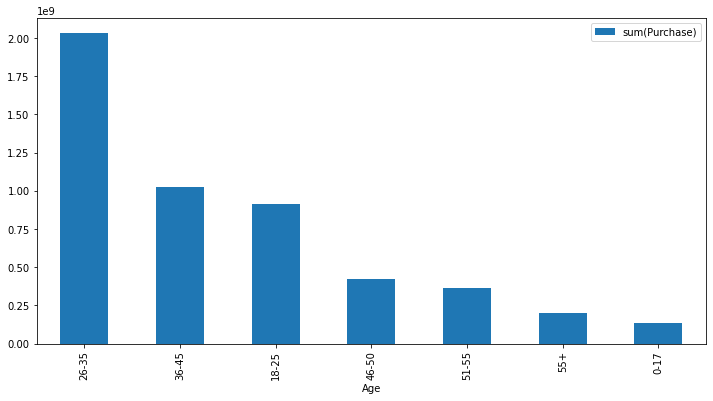

In [9]:
pandas_DF.plot(kind='bar',figsize=(12,6))

### Q6. What is the gender ratio in the dataset

In [10]:
rawDF.groupBy("Gender").agg({'Gender':'count'}).show()

+------+-------------+
|Gender|count(Gender)|
+------+-------------+
|     F|       135809|
|     M|       414259|
+------+-------------+



### Q7. What is the purchase amount ratio with respect to gender

In [11]:
rawDF.groupBy("Gender").agg({'Purchase':'sum'}).show()

+------+-------------+
|Gender|sum(Purchase)|
+------+-------------+
|     F|   1186232642|
|     M|   3909580100|
+------+-------------+



### Q8. Get shopping summary of each city

In [13]:
rawDF.groupBy("City_Category").agg({'Purchase':'sum'}).show()

+-------------+-------------+
|City_Category|sum(Purchase)|
+-------------+-------------+
|            B|   2115533605|
|            C|   1663807476|
|            A|   1316471661|
+-------------+-------------+



### Q9. Create table from the dataframe

In [14]:
rawDF.createOrReplaceTempView("purchase_table")  # convert dataframe to view
spark.sql("select * from purchase_table").show(10, False)

+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+--------+
|User_ID|Product_ID|Gender|Age  |Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Purchase|
+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+--------+
|1000001|P00069042 |F     |0-17 |10        |A            |2                         |0             |3                 |8370    |
|1000001|P00248942 |F     |0-17 |10        |A            |2                         |0             |1                 |15200   |
|1000001|P00087842 |F     |0-17 |10        |A            |2                         |0             |12                |1422    |
|1000001|P00085442 |F     |0-17 |10        |A            |2                         |0             |12                |1057    |
|1000002|P00285442 |M     |55+  |16        |C            |4+                        |0           

### Q10. Get the count of users for each city category by using spark sql query

In [16]:
spark.sql("select City_Category,count(User_ID) from purchase_table group by City_Category").show()

+-------------+--------------+
|City_Category|count(User_ID)|
+-------------+--------------+
|            B|        231173|
|            C|        171175|
|            A|        147720|
+-------------+--------------+

